<h1 align='center'> Bias-Variance of Random forest</h1> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)


### Train test split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=2)

In [5]:
X.shape

(500, 2)

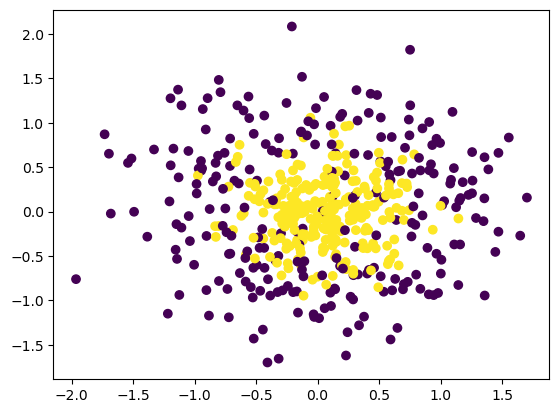

In [7]:
plt.scatter(X[:,0],X[:,1], c=y)

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

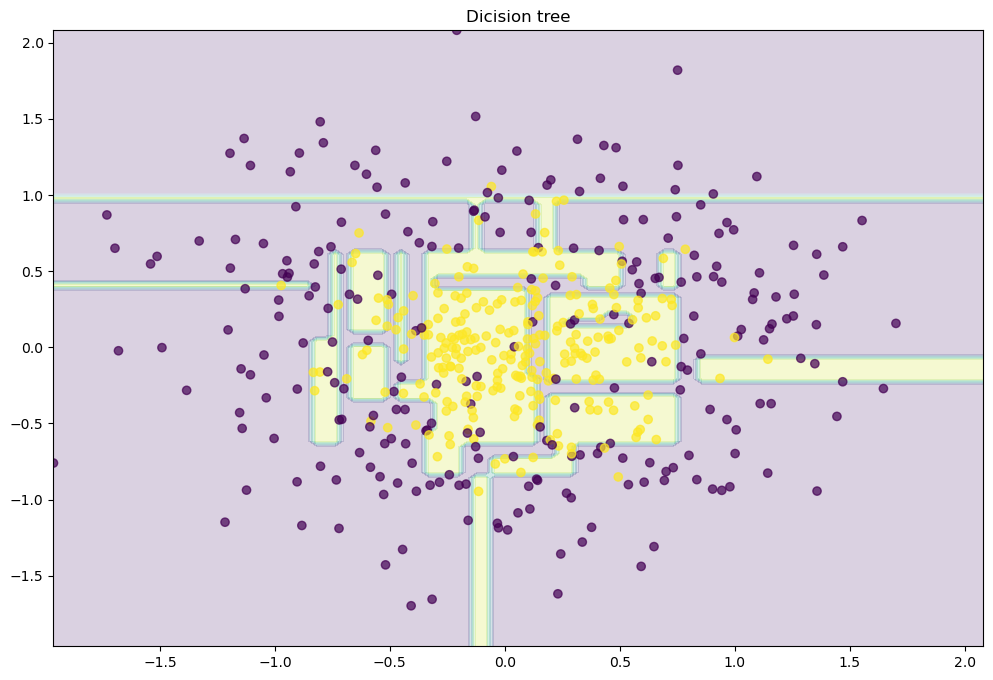

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(), X.max(),100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dt.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat, alpha=0.2)
plt.scatter(X[:,0],X[:,1], c=y, cmap='viridis', alpha=0.7)
plt.title('Dicision tree')
plt.show()

### Random forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier

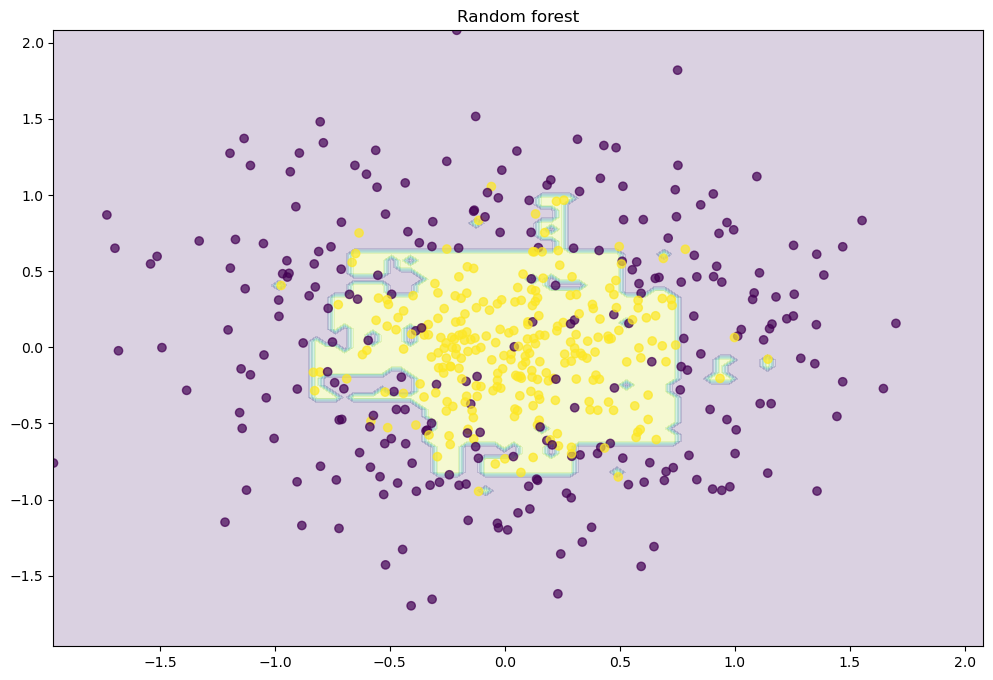

In [12]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [17]:
n_train= 150
n_test =1000
noise = 0.1

#Generate data
def f(x):
    x= x.ravel()
    return np.exp(-x**2) + 1.5 * np.exp(-(x - 2)** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X**2) + 1.5 * np.exp(-(X - 2)**2)\
    +np.random.normal(0.0, noise, n_samples)
    X= X.reshape(n_samples, 1)
    
    return X, y

X_train , y_train = generate(n_samples=n_train, noise=noise)
X_test , y_test = generate(n_samples=n_test, noise=noise)


(-5.0, 5.0)

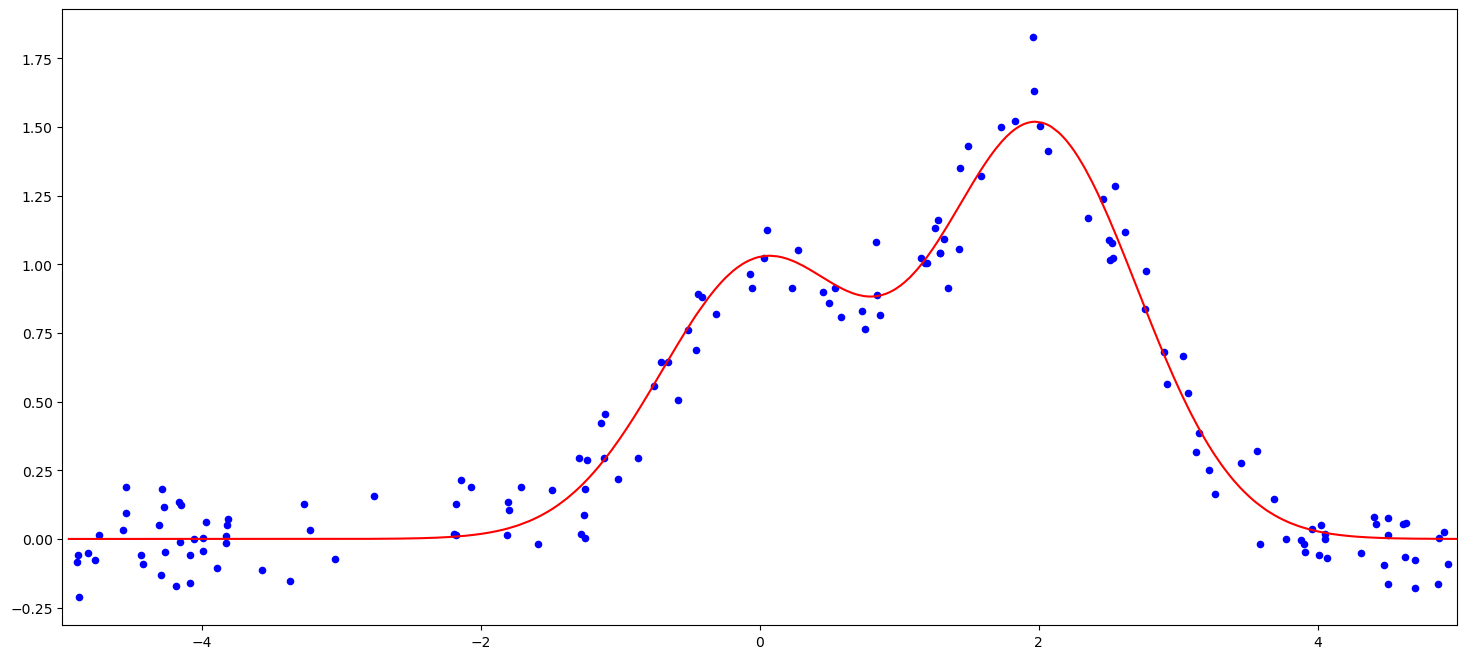

In [18]:
plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c='b', s=20)
plt.xlim([-5,5])

In [23]:
X =np.random.rand(150) * 10 - 5

In [24]:
np.sort(X).ravel()

array([-4.85618554e+00, -4.80855132e+00, -4.77574111e+00, -4.69973995e+00,
       -4.68256235e+00, -4.61061983e+00, -4.48010648e+00, -4.46652003e+00,
       -4.37605931e+00, -4.37435158e+00, -4.32983462e+00, -4.28965111e+00,
       -4.17727676e+00, -4.17263164e+00, -4.15434622e+00, -4.14896514e+00,
       -3.99021893e+00, -3.70321022e+00, -3.62851512e+00, -3.55921214e+00,
       -3.53078076e+00, -3.52724436e+00, -3.46308957e+00, -3.45074689e+00,
       -3.43793431e+00, -3.32642968e+00, -3.32508911e+00, -3.30271571e+00,
       -3.20643990e+00, -3.03346415e+00, -2.89493060e+00, -2.89206898e+00,
       -2.88768169e+00, -2.88364101e+00, -2.71124538e+00, -2.70634223e+00,
       -2.67981820e+00, -2.67494008e+00, -2.43536939e+00, -2.31437833e+00,
       -2.26359582e+00, -2.24711787e+00, -2.22987476e+00, -2.21631518e+00,
       -2.13480451e+00, -2.00616626e+00, -1.97580489e+00, -1.93536532e+00,
       -1.87222011e+00, -1.73746082e+00, -1.64720950e+00, -1.58094722e+00,
       -1.57354853e+00, -

### Desion tree regressor 

Text(0.5, 1.0, 'Decision tree, MSE= 21.77')

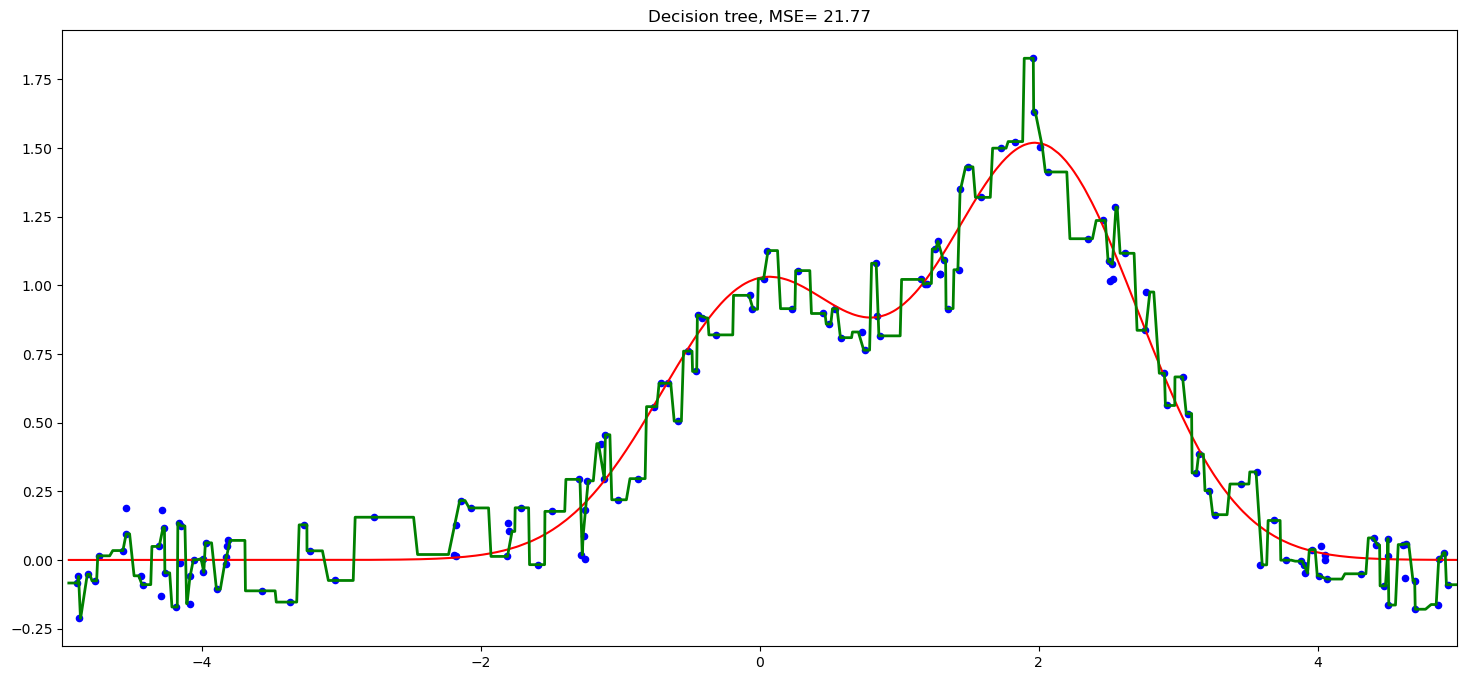

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, dt_pred, 'g', lw = 2)
plt.xlim([-5, 5])
plt.title('Decision tree, MSE= %.2f'
          % np.sum((y_test-dt_pred)**2))




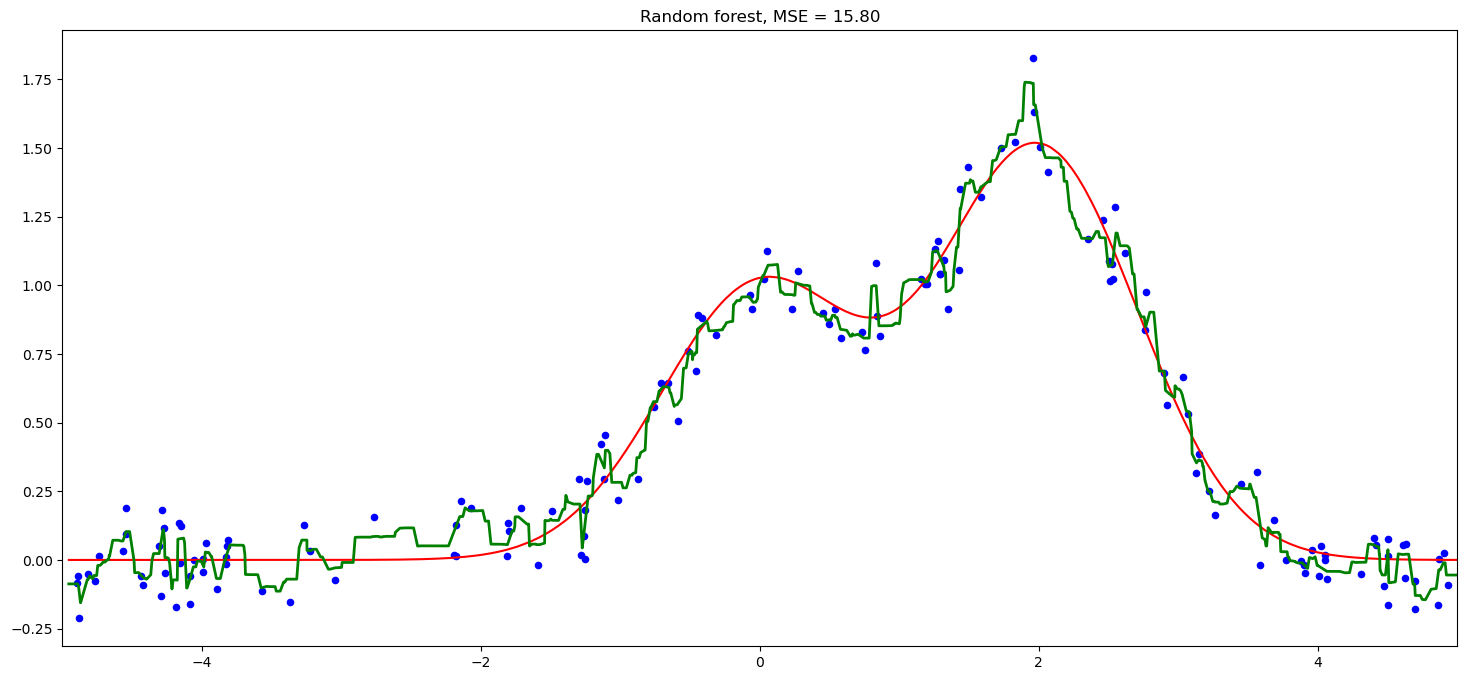

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));
